In [ ]:
#!/bin/bash
!curl -L -o airplane-crashes-since-1908.zip\  https://www.kaggle.com/api/v1/datasets/download/saurograndi/airplane-crashes-since-1908

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  563k  100  563k    0     0  1404k      0 --:--:-- --:--:-- --:--:-- 1404k


In [ ]:
import zipfile
with zipfile.ZipFile('/content/airplane-crashes-since-1908.zip ','r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [ ]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
df.shape

(5268, 13)

In [ ]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [ ]:
df.dtypes

,0
Date,object
Time,object
Location,object
Operator,object
Flight #,object
Route,object
Type,object
Registration,object
cn/In,object
Aboard,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [ ]:
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [ ]:
df.isnull().sum()

,0
Date,0
Time,2219
Location,20
Operator,18
Flight #,4199
Route,1707
Type,27
Registration,335
cn/In,1228
Aboard,22


In [ ]:
df.nunique()

,0
Date,4675
Time,1001
Location,4256
Operator,2467
Route,3219
Type,2420
Aboard,239
Fatalities,191
Ground,48


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns=["Flight #", "Registration", "cn/In", "Summary"], inplace=True)

In [ ]:
df.head()

,Date,Time,Location,Operator,Route,Type,Aboard,Fatalities,Ground
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,0.0


In [ ]:
df['Date']=pd.to_datetime(df['Date'],errors='ignore')

<ipython-input-105-513375653>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['Date']=pd.to_datetime(df['Date'],errors='ignore')


In [ ]:
df.dropna(subset=["Date", "Operator", "Location", "Aboard", "Fatalities",'Type','Ground'], inplace=True)

In [ ]:
df['Time'].value_counts()

,count
Time,
15:00,32
12:00,31
11:00,29
19:30,26
16:00,26
...,...
22:18,1
10:23,1
07:46,1


In [ ]:
time_mode=df['Time'].mode()[0]
df['Time']=df['Time'].fillna(time_mode)

In [ ]:
df['Time'].isnull().sum()

np.int64(0)

In [ ]:
route_mode=df['Route'].mode()[0]
df['Route']=df['Route'].fillna(route_mode)

In [ ]:
df['Route'].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Location,0
Operator,0
Route,0
Type,0
Aboard,0
Fatalities,0
Ground,0


In [ ]:
df.shape #null columnlari sildik deye shape (5181, 9) e dushdu

(5181, 9)

In [ ]:
df.info() #date columnunu datetime formatina deyisdik

<class 'pandas.core.frame.DataFrame'>
Index: 5181 entries, 0 to 5267
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5181 non-null   datetime64[ns]
 1   Time        5181 non-null   object        
 2   Location    5181 non-null   object        
 3   Operator    5181 non-null   object        
 4   Route       5181 non-null   object        
 5   Type        5181 non-null   object        
 6   Aboard      5181 non-null   float64       
 7   Fatalities  5181 non-null   float64       
 8   Ground      5181 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 404.8+ KB


In [ ]:
df['Year']=df['Date'].dt.year

In [ ]:
df['Year'].head()

,Year
0,1908
1,1912
2,1913
3,1913
4,1913


In [ ]:
df['Date'].head()

,Date
0,1908-09-17
1,1912-07-12
2,1913-08-06
3,1913-09-09
4,1913-10-17


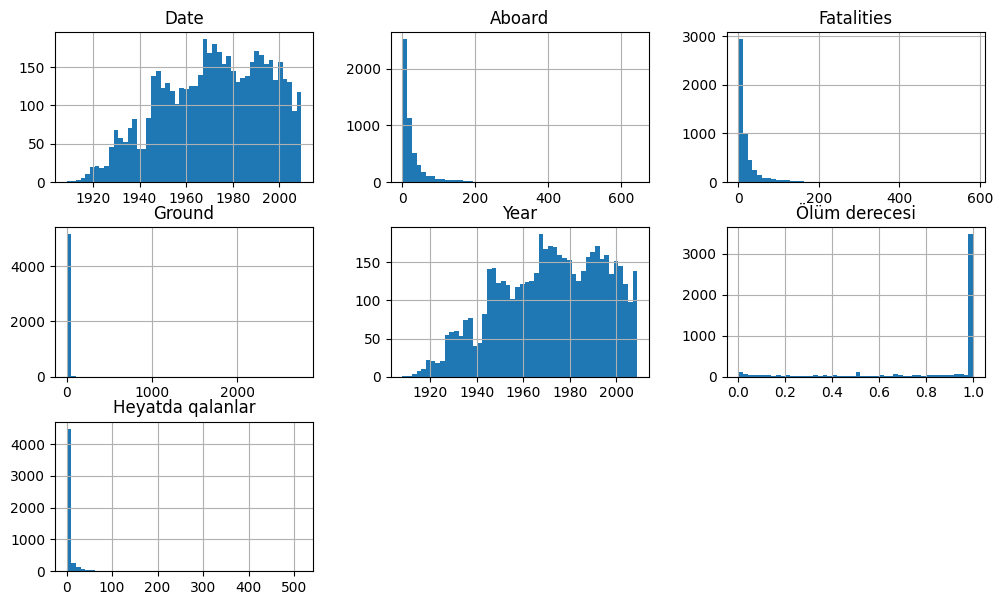

In [ ]:
df.hist(figsize = (12, 7), bins = 50);

<Axes: title={'center': 'Illere gore teyyare qezalarinin sayi'}, xlabel='Year'>

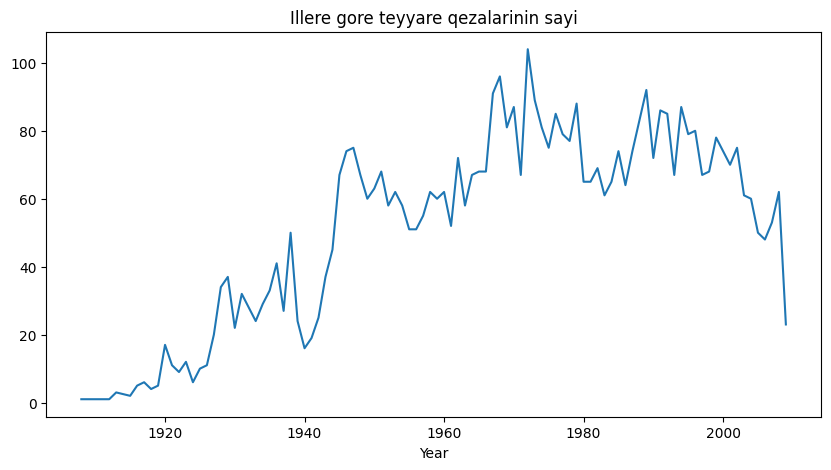

In [ ]:
df['Year'].value_counts().sort_index().plot(kind='line',figsize=(10,5),title='Illere gore teyyare qezalarinin sayi')

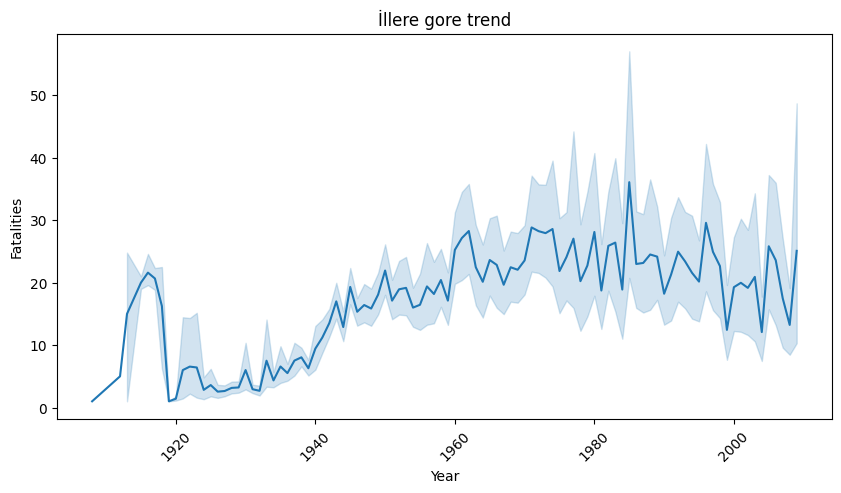

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Fatalities')
plt.title('İllere gore trend')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'En cox qeza keciren teyyare tipleri'}, ylabel='Type'>

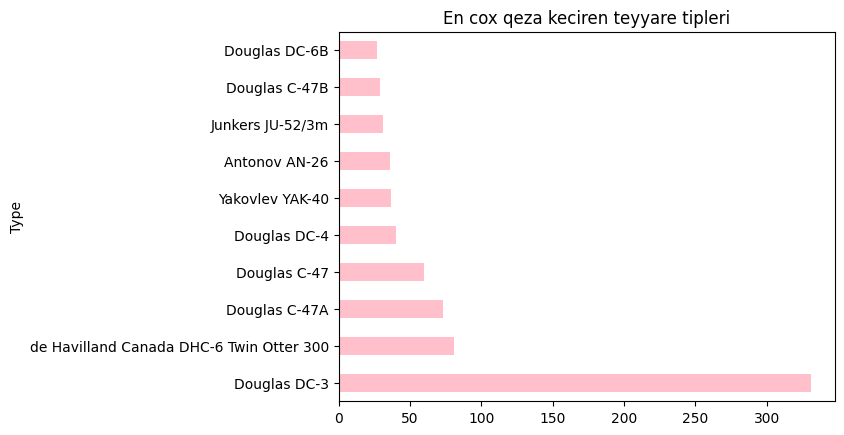

In [ ]:
df['Type'].value_counts().head(10).plot(kind='barh', title='En cox qeza keciren teyyare tipleri',color='pink')

<Axes: title={'center': 'En cox qeza keciren 10 operator'}, xlabel='Operator'>

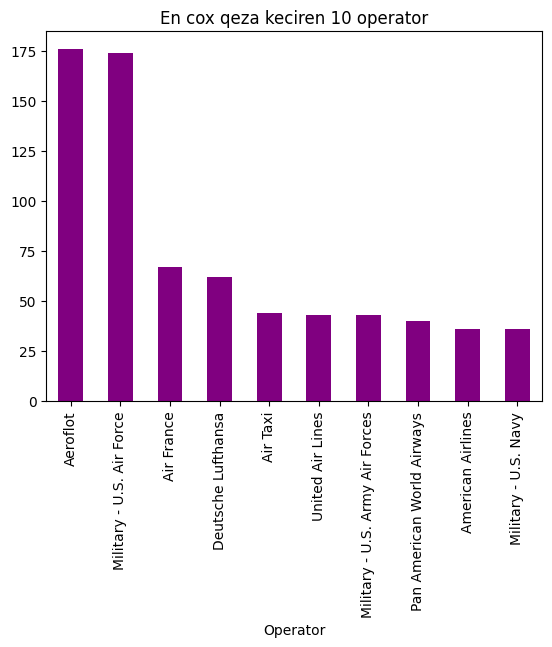

In [ ]:
df['Operator'].value_counts().head(10).plot(kind='bar', title='En cox qeza keciren 10 operator',color='purple')

In [ ]:
df['Ölüm derecesi']= df['Fatalities'] / df['Aboard']

In [ ]:
df['Ölüm derecesi'].head()

,Ölüm derecesi
0,0.5
1,1.0
2,1.0
3,0.7
4,1.0


In [ ]:
df['Heyatda qalanlar']=df['Aboard']-df['Fatalities']

In [ ]:
df['Heyatda qalanlar'].head()

,Heyatda qalanlar
0,1.0
1,0.0
2,0.0
3,6.0
4,0.0


<Axes: >

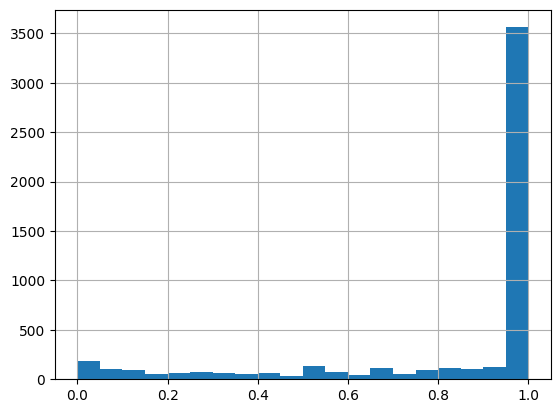

In [ ]:
df['Ölüm derecesi'].hist(bins=20)

<Axes: ylabel='Heyatda qalanlar'>

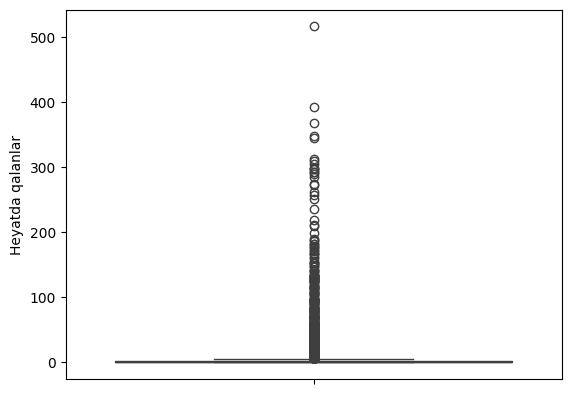

In [ ]:
sns.boxplot(df['Heyatda qalanlar'])

In [ ]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Aboard',
       'Fatalities', 'Ground', 'Year', 'Ölüm derecesi', 'Heyatda qalanlar'],
      dtype='object')

In [ ]:
df['Time']

,Time
0,17:18
1,06:30
2,15:00
3,18:30
4,10:30
...,...
5262,12:00
5263,06:30
5265,00:15
5266,08:30


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

<ipython-input-152-659835215>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time


In [ ]:
def cat_time(t):
    hour = t.hour
    if 5 <= hour < 12:
        return 'Səhər'
    elif 12 <= hour < 17:
        return 'Günorta'
    elif 17 <= hour < 21:
        return 'Axşam'
    else:
        return 'Gecə'

df['Time_Category'] = df['Time'].apply(cat_time)
df['Time_Category'].value_counts()

,count
Time_Category,
Günorta,2957
Səhər,936
Gecə,654
Axşam,634


<Axes: title={'center': 'Günün hansı vaxtı qəza daha çox olur?'}, xlabel='Time_Category'>

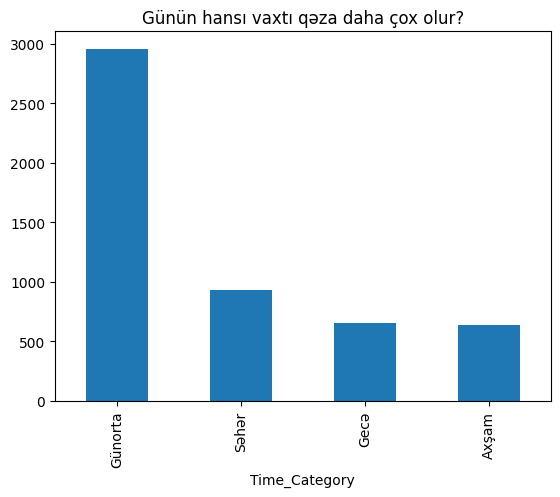

In [ ]:
df['Time_Category'].value_counts().plot(kind='bar', title='Günün hansı vaxtı qəza daha çox olur?')

<Axes: title={'center': 'Ən çox rastlanan marşrutlar'}, ylabel='Route'>

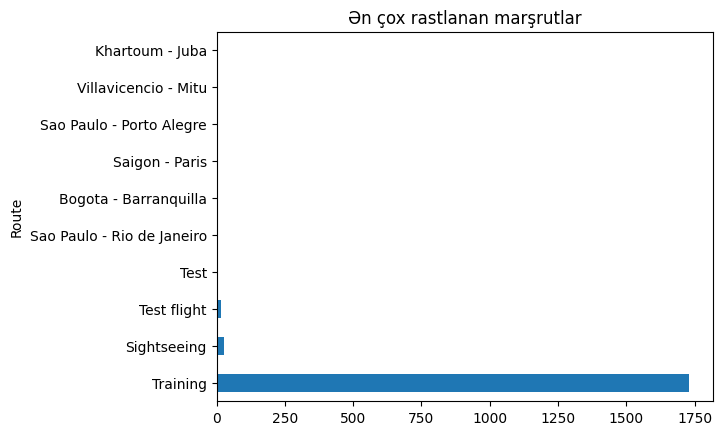

In [ ]:
numeric_df = df.select_dtypes(include=np.number)


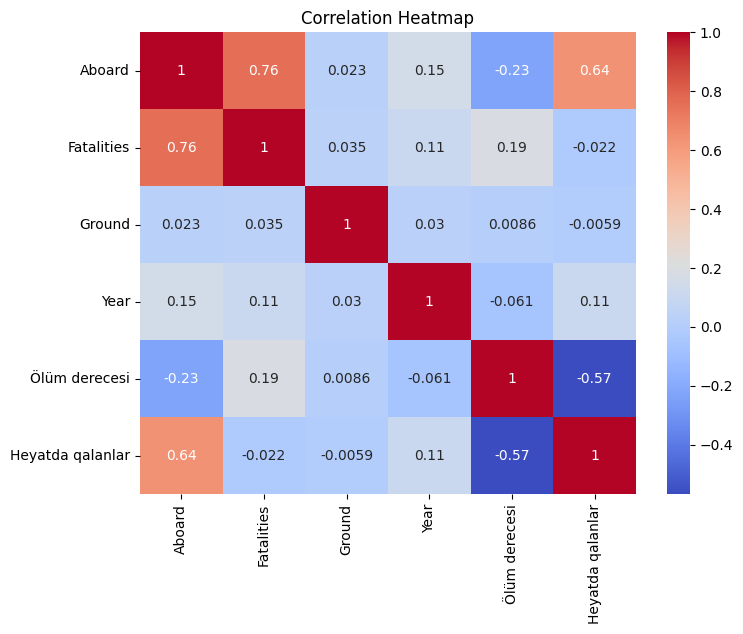

In [ ]:
plt.figure(figsize=(8,6))
corr =numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

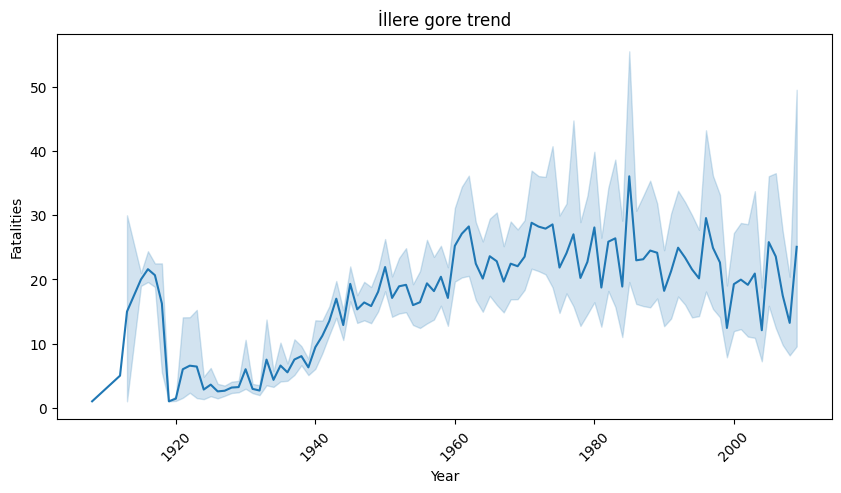

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Year', y='Fatalities')
plt.title('İllere gore trend')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.show()

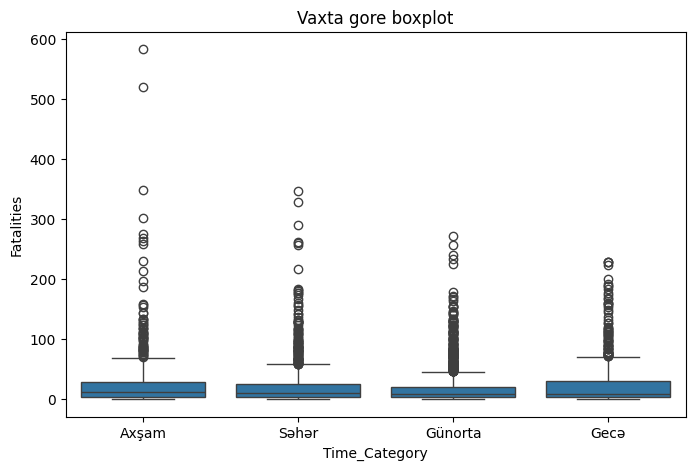

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Time_Category', y='Fatalities')
plt.title( 'Vaxta gore boxplot')
plt.show()